##About the Dataset

Fashion-MNIST is a dataset of of a training set of 60,000 examples and a test set of 10,000 examples.
Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Each training and test example is assigned to one of the following labels:


0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot



##Task

To come up with a model that can predict label for each image

##Importing Libraries

In [ ]:
# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
!wget https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_train.csv
!wget https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_test.csv

--2024-05-29 07:57:38--  https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_train.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133047193 (127M) [text/plain]
Saving to: ‘fashion-mnist_train.csv’

fashion-mnist_train 100%[===================>] 126.88M   163MB/s    in 0.8s    

2024-05-29 07:57:40 (163 MB/s) - ‘fashion-mnist_train.csv’ saved [133047193/133047193]

--2024-05-29 07:57:41--  https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_test.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTT

In [ ]:
# import train and test dataset
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(train.shape)

(60000, 785)


In [ ]:
print(test.shape)

(10000, 785)


In [ ]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [ ]:
# actural item corresponding to each label
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

##Train and test images

<ipython-input-10-13d45fc5c162>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


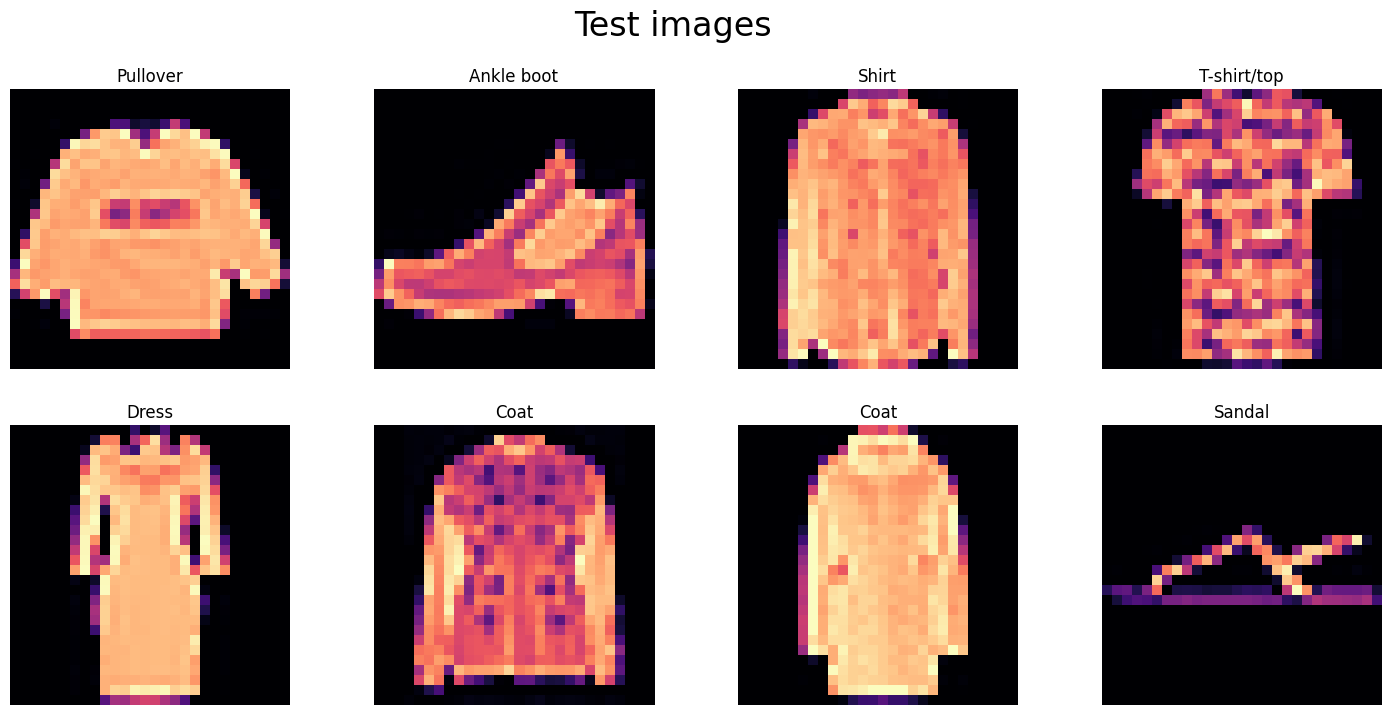

In [ ]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

<ipython-input-11-58be5b90b3ec>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


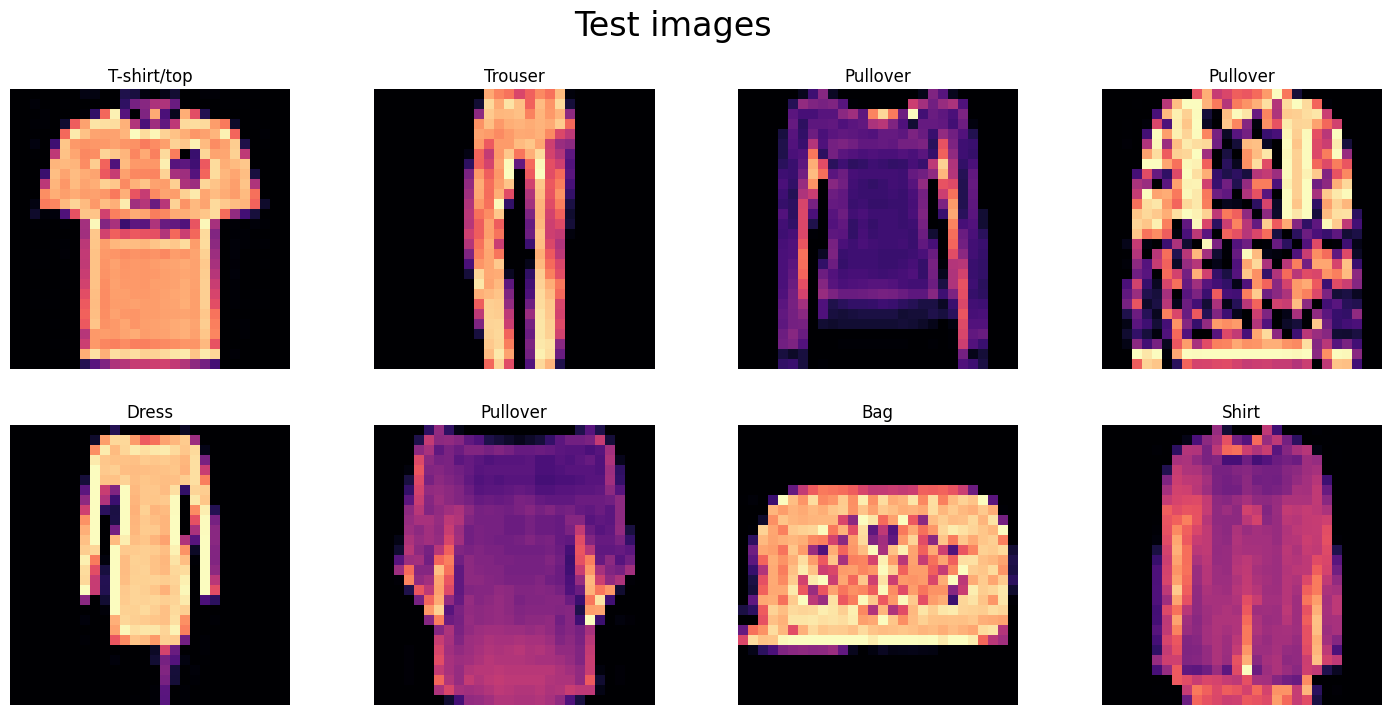

In [ ]:
# first few test images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

##Pre_Processing

In [ ]:
# split into image and labels and convert to numpy array
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


##Train and test images

In [ ]:
# reshaping images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# fix data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing images
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# one hot encoding targets
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

In [ ]:
# shape
for i in [X_train, y_train_enc, X_test, y_test_enc]:
    print(i.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_train, y_train_enc, test_size=0.3)
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)


##CNN

Model Parameters

In [ ]:
INPUT_SHAPE=(28,28,1)
OUTPUT_SHAPE=10
BATCH_SIZE=128
EPOCHS=10
VERBOSE=2

##Defining CNN model

In [ ]:
model=  Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

##Compile model

In [ ]:
# If the targets are one-hot encoded, use categorical_crossentropy.
# But if the targets are integers, use sparse_categorical_crossentropy

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

##Model fitting

In [ ]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
230/230 - 25s - loss: 0.8319 - accuracy: 0.6964 - val_loss: 0.4847 - val_accuracy: 0.8283 - 25s/epoch - 111ms/step
Epoch 2/10
230/230 - 28s - loss: 0.4963 - accuracy: 0.8211 - val_loss: 0.4087 - val_accuracy: 0.8496 - 28s/epoch - 121ms/step
Epoch 3/10
230/230 - 24s - loss: 0.4098 - accuracy: 0.8553 - val_loss: 0.3531 - val_accuracy: 0.8729 - 24s/epoch - 102ms/step
Epoch 4/10
230/230 - 22s - loss: 0.3651 - accuracy: 0.8719 - val_loss: 0.3421 - val_accuracy: 0.8747 - 22s/epoch - 96ms/step
Epoch 5/10
230/230 - 21s - loss: 0.3397 - accuracy: 0.8767 - val_loss: 0.3186 - val_accuracy: 0.8833 - 21s/epoch - 89ms/step
Epoch 6/10
230/230 - 25s - loss: 0.3166 - accuracy: 0.8869 - val_loss: 0.3163 - val_accuracy: 0.8800 - 25s/epoch - 107ms/step
Epoch 7/10
230/230 - 22s - loss: 0.2939 - accuracy: 0.8934 - val_loss: 0.3252 - val_accuracy: 0.8806 - 22s/epoch - 96ms/step
Epoch 8/10
230/230 - 22s - loss: 0.2776 - accuracy: 0.8989 - val_loss: 0.2922 - val_accuracy: 0.8941 - 22s/epoch - 95ms/s

##Accuracy and loss

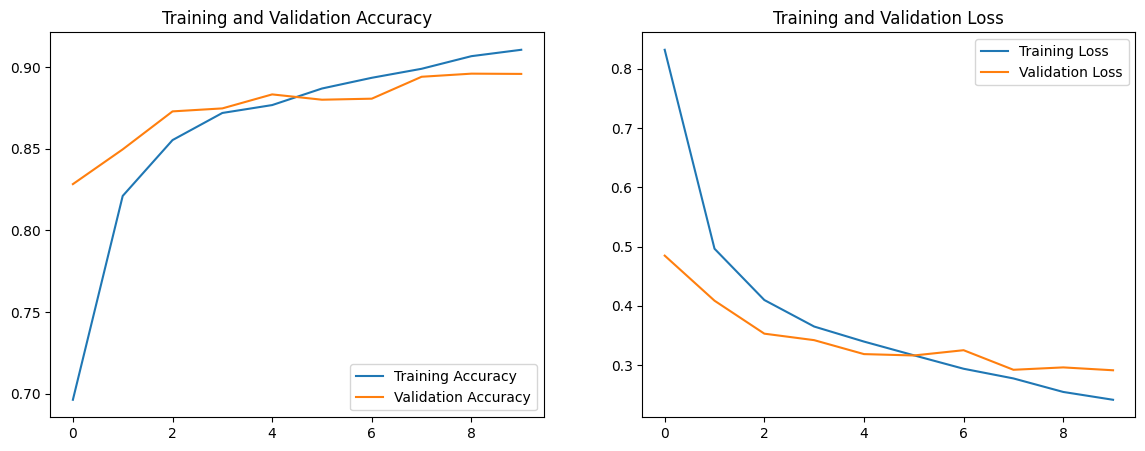

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

##Evaluating model

In [ ]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc)

563/563 [==============================] - 4s 7ms/step - loss: 0.2763 - accuracy: 0.9021


[0.2763307988643646, 0.9021111130714417]

##Predicting on test

In [ ]:
# predicted values
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 2s 7ms/step
[9.2808211e-01 2.2325762e-06 7.5864169e-05 1.0656650e-04 2.6062062e-06
 2.3995323e-08 7.1719907e-02 9.0523864e-09 1.0488607e-05 1.3079061e-09]
0


<ipython-input-27-e941a05ebcff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


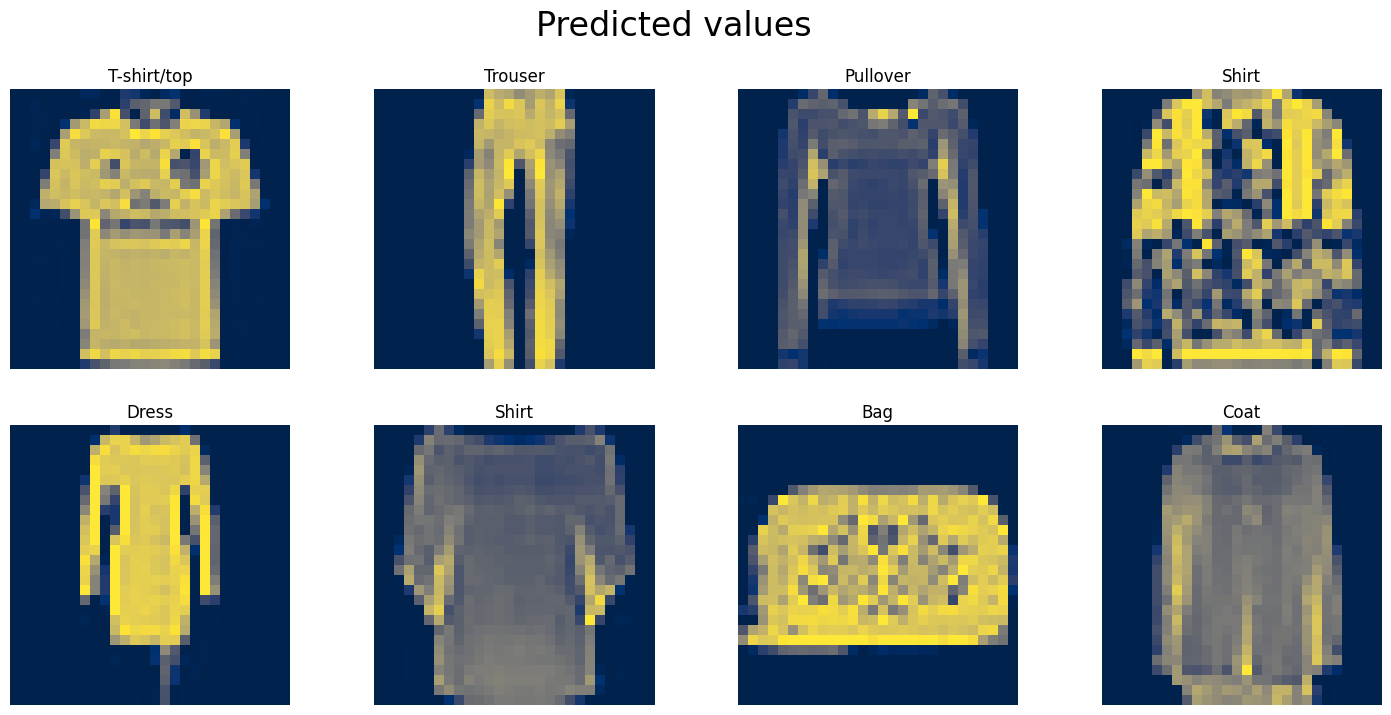

In [ ]:
# predicted targets of each images
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in enumerate(X_test[:8]):
    plt.subplot(2, 4, ind+1)
    plt.title(item[y_pred[ind]])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.95      0.88      0.91      1000
           4       0.79      0.91      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.66      0.70      1000
           7       0.97      0.93      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



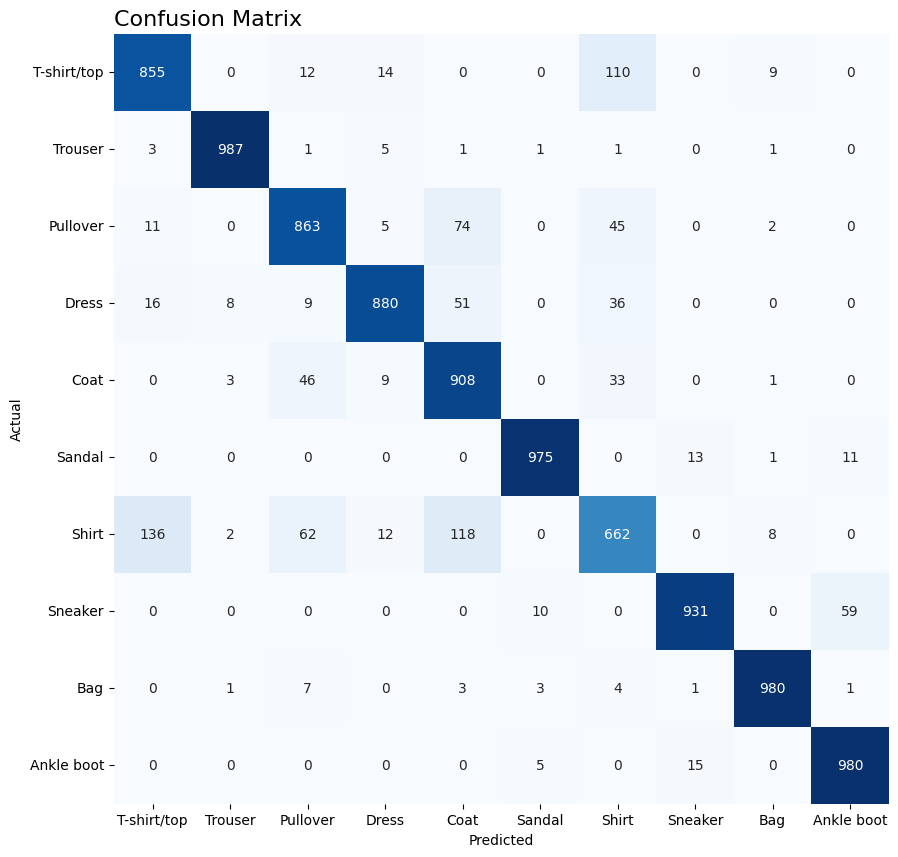

In [ ]:
# y_pred_item = [item[i] for i in y_pred]
# y_test_item = [item[i] for i in y_test]

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(item.values())
ax.set_yticklabels(item.values(), rotation=0)
plt.show()